In [1]:
import polars as pl
import plotly.express as px

In [2]:
df = pl.read_csv("./benches_f64.csv")

In [4]:
df

name,n_rows,vector_size,n_tests,total_time,time_ms
str,i64,i64,i64,f64,f64
"""1x4""",1,4,10000,6.528671,0.652867
"""1x8""",1,8,10000,6.567821,0.656782
"""1x16""",1,16,10000,6.577598,0.65776
"""1x24""",1,24,10000,6.60411,0.660411
"""1x32""",1,32,10000,6.637448,0.663745
…,…,…,…,…,…
"""100000x32""",100000,32,10000,338.397321,33.839732
"""100000x64""",100000,64,10000,356.102173,35.610217
"""100000x128""",100000,128,10000,403.226947,40.322695


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='vector_size', ylabel='time_ms'>

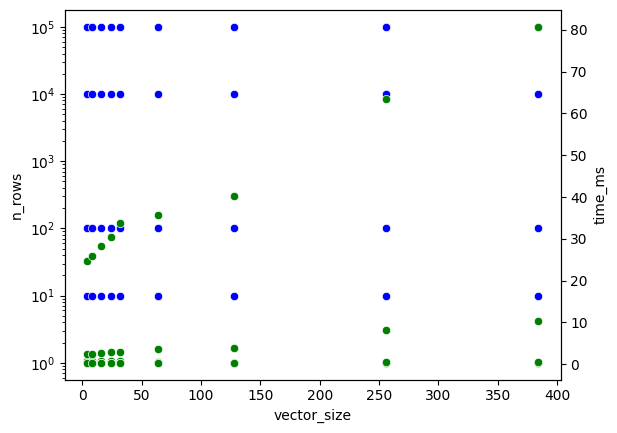

In [23]:
ax = sns.scatterplot(
    data=df,
    color="b",
    y="n_rows",
    x="vector_size",
    legend=True
)
ax.set(yscale="log")
ax2= plt.twinx()
sns.scatterplot(data=df, color="g", ax=ax2,
                y="time_ms",
                x="vector_size",
                legend=True
    )

In [30]:
df.columns = ["name", *[f"{col}_f64"  for col in df.columns if col != "name"]]

In [31]:
df

name,n_rows_f64,vector_size_f64,n_tests_f64,total_time_f64,time_ms_f64
str,i64,i64,i64,f64,f64
"""1x4""",1,4,10000,6.528671,0.652867
"""1x8""",1,8,10000,6.567821,0.656782
"""1x16""",1,16,10000,6.577598,0.65776
"""1x24""",1,24,10000,6.60411,0.660411
"""1x32""",1,32,10000,6.637448,0.663745
…,…,…,…,…,…
"""100000x32""",100000,32,10000,338.397321,33.839732
"""100000x64""",100000,64,10000,356.102173,35.610217
"""100000x128""",100000,128,10000,403.226947,40.322695
